# ESTUDO DE CASO REALIZADO COMO TRABALHO FINAL DO CURSO GOOGLE DATA ANALYTICS

**CENÁRIO**

Você é um analista de dados júnior que trabalha na equipe de analistas de marketing da Bellabeat, uma fabricante de produtos de alta tecnologia voltados à saúde para mulheres. A Bellabeat é uma pequena empresa de sucesso, mas tem potencial para se adquirir maior participação no mercado
 

global de dispositivos inteligentes. Urška Sršen, cofundadora e CEO da Bellabeat, acredita que a análise de dados de condicionamento físico a partir de dispositivos inteligentes pode ajudar a abrir novas oportunidades de crescimento para a empresa. Foi solicitado que você se concentre em um dos produtos da Bellabeat e analise dados de dispositivos inteligentes para obter informações sobre como os consumidores estão usando esses dispositivos. Os insights que você descobrir ajudarão a orientar a estratégia de marketing da empresa. Você apresentará sua análise à equipe executiva da Bellabeat juntamente com suas recomendações de alto nível para a estratégia de marketing da empresa.


**PERGUNTAS DE NEGÓCIO**

A CEO da Bellabeat solicita que você analise os dados de uso de dispositivos inteligentes para obter informações sobre como os consumidores usam dispositivos inteligentes
que não são da Bellabeat. Em seguida, ela quer que você selecione um produto da Bellabeat para aplicar esses insights em sua apresentação. 
Estas perguntas deverão nortear sua análise:
 
1.	Quais são algumas das tendências no uso de dispositivos inteligentes?
2.	Como essas tendências podem se aplicar aos clientes da Bellabeat?
3.	Como essas tendências podem ajudar a influenciar a estratégia de marketing da Bellabeat?


In [1]:
# IMPORTAÇÃO DAS BIBLIOTECAS
import pandas as pd
import numpy as np

# COLETA DOS DADOS

Os dados utilizados no presente estudo são os do rastreador de condicionamento físico FitBit (CC0: Domínio público, conjunto de dados disponibilizado por meio de Mobius):
Este conjunto de dados de Kaggle contém um rastreador de condicionamento físico pessoal de trinta usuários do Fitbit. Trinta usuários elegíveis do Fitbit consentiram com 
o envio de dados pessoais do rastreador, incluindo os resultados a cada minuto de atividade física, frequência cardíaca e monitoramento do sono.
São abrangidas informações sobre atividades diárias, passos e frequência cardíaca que podem ser usadas para explorar os hábitos dos usuários.

link para os dados <https://www.kaggle.com/datasets/arashnic/fitbit>

In [2]:
# COLETA DE DADOS
# OS DATASETS FORAM SALVOS NO MESMO DIRETÓRIO DE TRABALHO DO JUPYTER LAB
lista_data_frames=[]
lista_dados=['dailyActivity_merged','dailyCalories_merged','dailyIntensities_merged','dailySteps_merged',
             'heartrate_seconds_merged','hourlyCalories_merged','hourlyIntensities_merged',
            'hourlySteps_merged','minuteCaloriesNarrow_merged','minuteCaloriesWide_merged','minuteIntensitiesNarrow_merged',
            'minuteIntensitiesWide_merged','minuteMETsNarrow_merged','minuteSleep_merged','minuteStepsNarrow_merged',
            'minuteStepsWide_merged','sleepDay_merged','weightLogInfo_merged']
for data in lista_dados:
    dados = pd.read_csv(data +'.csv')
    lista_data_frames.append(dados)

In [3]:
#EXIBE PARCIALMENTE TODAS AS TABELAS
for index in range(0,18):
    print(lista_dados[index],':','\n'*2) # EXIBINDO O NOME DO DATASET
    print(lista_data_frames[index].head(5),'\n','*'*80,'\n'*3) # EXIBINDO OS DADOS

dailyActivity_merged : 


           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes

## OVERVIEW DOS DATASETS

* **[0]dailyActivity_merged**: Registro do número de passos, distância total percorrida, distãncias percorridas em  alto, moderado,leve e sedentário estado ativo, marca também o tempo nesses estados( por minuto), por fim , marca as calorias totais gastas.

* **[1]dailyCalories_merged**: Registro diário das calorias gastas.

* **[2]dailyIntensities_merged**:  Registra o tempo em minutos do estado ativo e distância percorrida nesses estados.

* **[3]dailySteps_merged**: Registro dos passos diários.

* **[4]heartrate_seconds_merged**: Registro da frequência cardíaca a cada 5 segundos.

* **[5]hourlyCalories_merged**: Registro do número de calorias gasto por hora.

* **[6]hourlyIntensities_merged**: Registro da intensidade do estado ativo medido por hora.

* **[7]hourlySteps_merged**: Registro do número de passos por hora.

* **[8]minuteCaloriesNarrow_merged**: Registro das calorias gastas por minuto.

* **[9]minuteCaloriesWide_merged**: Registro das calorias gastas por minuto na veresão ampla.

* **[10]minuteIntensitiesNarrow_merged**: Registro do estado de intensidade de atividade por minuto.

* **[11]minuteIntensitiesWide_merged**: Registro do estado de intensidade de atividade por minuto versão ampla.

* **[12]minuteMETsNarrow_merged**: Registro do MET por minuto.

* **[13]minuteSleep_merged**: Registro do sono por minuto.

* **[14]minuteStepsNarrow_merged**: Registro dos passos por minuto.

* **[15]minuteStepsWide_merged**: Registro dos passos por minuto na versão ampla.

* **[16]sleepDay_merged**: Registro de minutos dormidos por dia e de minutos na cama ( bom para ver questões de insônia).

* **[17]weightLogInfo_merged**: Registro do peso do usuário.

##### OS SEGUINTES CONJUNTOS DE DADOS FORAM SELECIONADOS PARA ANÁLISE: 
* dailyActivity_merged
* sleepDay_merged
* hourlyCalories_merged
* hourlySteps_merged
  
 Obs.: Os dados de peso do usuário não foram objeto de análise, pois se limitavam a informações de oito indivíduos. 

# LIMPEZA E TRATAMENTO DOS DADOS

## LIMPEZA E TRATAMENTO 'dailyActivity_merged'

In [4]:
# carga dos dados na variável
dados_atividade_diaria = lista_data_frames[0] # OPÇÃO PARA TODOS OS ARQUIVOS SALVOS LOCALMENTE
# verificação dos tipos de dados no dataframe
dados_atividade_diaria.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [5]:
# ActivityDate é do tipo objeto, é necessário alterar para datetime
dados_atividade_diaria['ActivityDate']= pd.to_datetime(dados_atividade_diaria['ActivityDate'])
dados_atividade_diaria.dtypes

Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [6]:
# VERIFICANDO OS DADOS FALTANTES
dados_atividade_diaria.isnull().sum() # NÃO HÁ DADOS FALTANTES

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

## LIMPEZA E TRATAMENTO 'sleepDay_merged'

In [7]:
# carga dos dados na variável
dados_sono = lista_data_frames[16]
# verificação dos tipos de dados no dataframe
dados_sono.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [8]:
# SleepDay é do tipo objeto, é necessário alterar para datetime
dados_sono['SleepDay']= pd.to_datetime(dados_sono['SleepDay'])
dados_sono.dtypes

C:\Users\SGTME\AppData\Local\Temp\ipykernel_11988\884595608.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dados_sono['SleepDay']= pd.to_datetime(dados_sono['SleepDay'])


Id                             int64
SleepDay              datetime64[ns]
TotalSleepRecords              int64
TotalMinutesAsleep             int64
TotalTimeInBed                 int64
dtype: object

In [9]:
dados_sono.isnull().sum() # NÃO HÁ DADOS FALTANTES

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

## LIMPEZA E TRATAMENTO 'hourlyCalories_merged'

In [10]:
# carga dos dados na variável
dados_calorias_hora = lista_data_frames[5]
# verificação dos tipos de dados no dataframe
dados_calorias_hora.dtypes

Id               int64
ActivityHour    object
Calories         int64
dtype: object

In [11]:
# ActivityHour é do tipo objeto, é necessário alterar para datetime
dados_calorias_hora['ActivityHour']= pd.to_datetime(dados_calorias_hora['ActivityHour'])
dados_calorias_hora.dtypes

C:\Users\SGTME\AppData\Local\Temp\ipykernel_11988\3454563445.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dados_calorias_hora['ActivityHour']= pd.to_datetime(dados_calorias_hora['ActivityHour'])


Id                       int64
ActivityHour    datetime64[ns]
Calories                 int64
dtype: object

In [12]:
dados_calorias_hora.isnull().sum() # NÃO HÁ DADOS FALTANTES

Id              0
ActivityHour    0
Calories        0
dtype: int64

## LIMPEZA E TRATAMENTO 'hourlySteps_merged'

In [13]:
# carga dos dados na variável
dados_passos_hora = lista_data_frames[7]
# verificação dos tipos de dados no dataframe
dados_passos_hora.dtypes

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

In [14]:
# ActivityDay é do tipo objeto, é necessário alterar para datetime
dados_passos_hora['ActivityHour']= pd.to_datetime(dados_passos_hora['ActivityHour'])
dados_passos_hora.dtypes

C:\Users\SGTME\AppData\Local\Temp\ipykernel_11988\75133716.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dados_passos_hora['ActivityHour']= pd.to_datetime(dados_passos_hora['ActivityHour'])


Id                       int64
ActivityHour    datetime64[ns]
StepTotal                int64
dtype: object

In [15]:
dados_passos_hora.isnull().sum() # NÃO HÁ DADOS FALTANTES

Id              0
ActivityHour    0
StepTotal       0
dtype: int64

# PROCESSAMENTO DOS DADOS


In [16]:
# PROCESSAR DATAS PARA EXTRAIR MESES E DIAS DA SEMANA
# AGREGAR OS DADOS
# FAZER O JOIN DAS TABELAS

## dailyActivity_merged

#### PROCESSANDO AS DATAS

In [17]:
# INSERINDO O MÊS DA ATIVIDADE
dados_atividade_diaria['mes_atividade'] = dados_atividade_diaria['ActivityDate'].dt.month

# INSERINDO O DIA DA SEMANA
# A FUNÇÃO WEEKDAY RETORNA O DIA DA SEMANA COMO UM INTEIRO ENTRE 1-6, DESTA FORMA FOI NECESSÁRIO MAPEAR
# PARA CONVERTER O INTEIRO NA STRING CORRESPONDENTE.

dados_atividade_diaria['dia_da_semana'] = dados_atividade_diaria['ActivityDate'].dt.weekday.map({
    0: "segunda-feira",
    1: "terça-feira",
    2: "quarta-feira",
    3: "quinta-feira",
    4: "sexta-feira",
    5: "sábado",
    6: "domingo"
})
dados_atividade_diaria.head(2)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,mes_atividade,dia_da_semana
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4,terça-feira
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,4,quarta-feira


In [18]:
# ENRIQUECENDO O DATAFRAME COM A COLUNA TEMPO DE EXERCÍCIO, ESTA SERÁ FORMADA PELA ADIÇÃO DAS COLUNAS [VeryActiveMinutes] E [FairlyActiveMinutes] QUE PARECEM SER OS INTERVALOS DE REAL
# ATIVIDADE FÍSICA
dados_atividade_diaria['minutos_atividade_fisica'] = dados_atividade_diaria['VeryActiveMinutes'] + dados_atividade_diaria['FairlyActiveMinutes']


#### CRIANDO AS TABELAS AGREGADAS

In [37]:
# CRIANDO A TABELA DOS DADOS MÉDIOS AGREGADOS POR ID
atividade_agregada_id = dados_atividade_diaria.groupby('Id')

atividade_agregada_id_medias= atividade_agregada_id[['TotalSteps','TotalDistance','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance',
                      'VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories','minutos_atividade_fisica']].mean().round(2)

# EXISTE UMA RECOMENDAÇÃO GENÉRICA DA OMS ( ORGANIZAÇÃO MUNDIAL DE SAÚDE) QUE RECOMENDA ATIVIDADE FÍSICA EQUIVALENTE A 7.500 PASSOS POR DIA
# COMO NÃO EXISTEM NOS DATASETS FORNECIDOS INFORMAÇÕES RELATIVAS A PESO E GÊNERO DOS USUÁRIOS, ESTA SERÁ A MEDIDA UTILIZADA PARA BALIZAR SE
# O USUÁRIO TEM UMA ATIVIDADE FÍSICA SATISFATÓRIA
# AQUI CRIAMOS A COLUNA CORRESPONDENTE:

atividade_agregada_id_medias['minimo_oms'] = atividade_agregada_id_medias['TotalSteps'].apply(lambda x: "Menor que 7500" if x < 7500 else "Maior ou igual a 7500")
atividade_agregada_id_medias.head(2)

# CRIANDO A TABELA DOS DADOS DE DESVIO PADRÃO AGREGADOS POR ID:

atividade_agregada_id_desvio= atividade_agregada_id[['TotalSteps','TotalDistance','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance',
                      'VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories','minutos_atividade_fisica']].std().round(2)
atividade_agregada_id_desvio.head(2)

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,minutos_atividade_fisica
Id,,,,,,,,,,,
1503960366,3052.48,1.98,1.23,0.46,1.32,16.02,10.63,57.01,202.94,352.57,21.53
1624580081,6177.05,4.80,3.93,0.87,1.43,33.41,13.74,40.94,93.98,256.58,45.74


## sleepDay_merged

#### PROCESSANDO AS DATAS

In [20]:
# INSERINDO O MÊS DA ATIVIDADE
dados_sono['mes'] = dados_sono['SleepDay'].dt.month

# INSERINDO O DIA DA SEMANA
# A FUNÇÃO WEEKDAY RETORNA O DIA DA SEMANA COMO UM INTEIRO ENTRE 1-6, DESTA FORMA FOI NECESSÁRIO MAPEAR
# PARA CONVERTER O INTEIRO NA STRING CORRESPONDENTE.

dados_sono['dia_da_semana'] = dados_sono['SleepDay'].dt.weekday.map({
    0: "segunda-feira",
    1: "terça-feira",
    2: "quarta-feira",
    3: "quinta-feira",
    4: "sexta-feira",
    5: "sábado",
    6: "domingo"
})

# CRIANDO A COLUNA [total_sono_horas]

dados_sono['total_sono_horas'] = (dados_sono['TotalMinutesAsleep']/60).round(2)
dados_sono.head(2)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,mes,dia_da_semana,total_sono_horas
0,1503960366,2016-04-12,1,327,346,4,terça-feira,5.45
1,1503960366,2016-04-13,2,384,407,4,quarta-feira,6.40


#### CRIANDO AS TABELAS AGREGADAS

In [21]:
# CRIANDO A TABELA DOS DADOS MÉDIOS AGREGADOS POR [Id]
dados_sono_agregado_Id = dados_sono.groupby('Id')

dados_sono_agregado_Id_media = dados_sono_agregado_Id[['total_sono_horas','TotalTimeInBed']].mean()
dados_sono_agregado_Id_media

# EXISTE UMA RECOMENDAÇÃO GENÉRICA DA OMS ( ORGANIZAÇÃO MUNDIAL DE SAÚDE) QUE RECOMENDA NO MÍNIMO 7 HORAS DE SONO
# INSERINDO COLUNA QUE INFORMA SE O USUÁRIO DORMIU O MÍNIMO NECESSÁRIO

dados_sono_agregado_Id_media['minimo_oms'] = dados_sono_agregado_Id_media['total_sono_horas'].apply(lambda x: "Menos de 7h" if x < 7 else "7h ou mais")
#dados_sono_agregado_Id_media

## hourlyCalories_merged

#### PROCESSANDO AS DATAS

In [22]:
# INSERINDO A HORA DA ATIVIDADE
dados_calorias_hora['hora'] = dados_calorias_hora['ActivityHour'].dt.hour

#### CRIANDO AS TABELAS AGREGADAS

In [23]:
# AGREGANDO OS DADOS PELA HORA DO DIA
dados_calorias_hora_agregado_hora = dados_calorias_hora.groupby('hora')

## hourlySteps_merged

#### PROCESSANDO AS DATAS

In [24]:
# INSERINDO A HORA DA ATIVIDADE
dados_passos_hora['hora'] = dados_passos_hora['ActivityHour'].dt.hour

#### CRIANDO AS TABELAS AGREGADAS

In [25]:
# AGREGANDO OS DADOS PELA HORA DO DIA
dados_passos_hora_agregado = dados_passos_hora.groupby('hora')

In [36]:
dados_passos_hora.head(2)

,Id,ActivityHour,StepTotal,hora
0,1503960366,2016-04-12 00:00:00,373,0
1,1503960366,2016-04-12 01:00:00,160,1


In [27]:
#for i in range (0, len(dados_atividade_diaria.columns)):
    #print(  i,' : ', dados_atividade_diaria.columns[i])

In [38]:
dados_atividade_diaria.head(2)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,mes_atividade,dia_da_semana,minutos_atividade_fisica
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4,terça-feira,38
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,4,quarta-feira,40


# ANÁLISE E COMPARTILHAMENTO

EXISTE UMA RECOMENDAÇÃO GENÉRICA DA OMS (ORGANIZAÇÃO MUNDIAL DE SAÚDE) QUE RECOMENDA ATIVIDADE FÍSICA EQUIVALENTE A 7.500 PASSOS POR DIA, COMO TAMBÉM RECOMENDA A PRÁTICA DE 30 MINUTOS DIÁRIOS DE ATIVIDADE FÍSICA.
COMO NÃO EXISTEM NOS DATASETS FORNECIDOS INFORMAÇÕES RELATIVAS A PESO E GÊNERO DOS USUÁRIOS, ESTAS SERÃO AS MEDIDAS UTILIZADA PARA BALIZAR SE O USUÁRIO TEM UMA ATIVIDADE FÍSICA SATISFATÓRIA.

A análise dos dados contidos na tabela [dailyActivity_merged] permite inferir os seguintes fatos:

* Praticamente metade dos usuários não possui uma média de minutos de atividade física que atenda ao mínimo recomendado pela OMS.
  
* A mesma proporção é identificada com relação ao número de passos recomendados, ou seja, mais da metade dos usuários não tem uma média que satisfaça o mínimo.
  
* Também é possível identificar que atividade física dos usuários é bastante irregular, para tal conclusão foi criado o histograma do desvio padrão tanto dos minutos de atividade
física de cada usuário como do número de passos diários. Onde percebe-se uma quantidade expressiva de usuários variando suas atividades entre 35-50 minutos e o número de passos entre 3000 e 4000.

* Das informações alcançadas, podemos concluir que a maioria dos usuários (considerando que os dados fossem suficientes e não enviesados), ainda que adquiram um relógio para rastreamento de saúde, não praticam atividade física de satisfatória e regular.

<Axes: xlabel='Média de minutos de atividade física por dia', ylabel=' Frequência'>

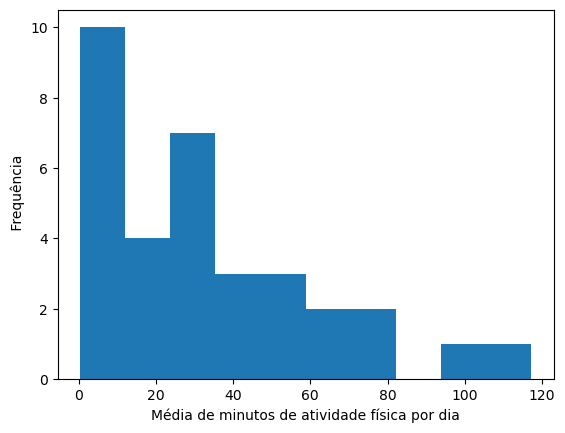

In [29]:
# CRIANDO HISTOGRAMA DOS MINUTOS MÉDIOS DE ATIVIDADE FÍSICA POR DIA DOS USUÁRIOS.
atividade_agregada_id_medias['minutos_atividade_fisica'].plot.hist(xlabel= 'Média de minutos de atividade física por dia', ylabel=' Frequência')


<Axes: title={'center': 'MÍNIMO OMS'}>

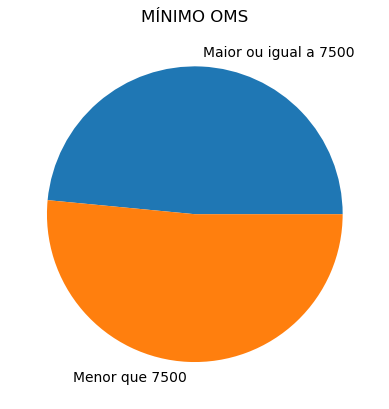

In [30]:
# CRIANDO GRÁFICO DE PIZZA PARA VISUALIZAR O ATENDIMENTO DOS USUÁRIOS AO MÍNIMO DE PASSOS RECOMENDADO PELA OMS
atividade_agregada_id_medias.groupby('minimo_oms').count()['TotalSteps'].plot.pie(ylabel= '', title = 'MÍNIMO OMS')

<Axes: xlabel='Desvio padrão de minutos de atividade física por dia por usuário', ylabel=' Frequência'>

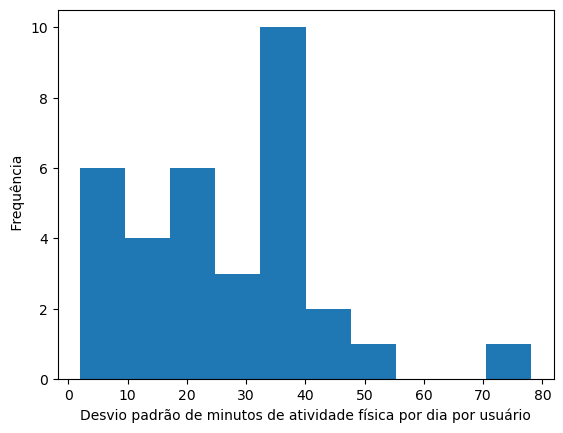

In [31]:
# CRIANDO HISTOGRAMA DO DESVIO PADRÃO DE MINUTOS DE ATIVIDADE FÍSICA POR DIA DOS USUÁRIOS.
atividade_agregada_id_desvio['minutos_atividade_fisica'].plot.hist(xlabel= 'Desvio padrão de minutos de atividade física por dia por usuário', ylabel=' Frequência')


<Axes: xlabel='Desvio padrão de passos por dia por usuário', ylabel=' Frequência'>

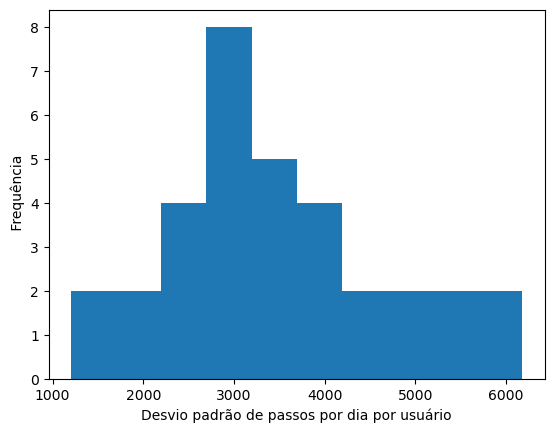

In [32]:
# CRIANDO HISTOGRAMA DO DESVIO PADRÃO DE MINUTOS DE ATIVIDADE FÍSICA POR DIA DOS USUÁRIOS.
atividade_agregada_id_desvio['TotalSteps'].plot.hist(xlabel= 'Desvio padrão de passos por dia por usuário', ylabel=' Frequência')

EXISTE UMA RECOMENDAÇÃO GENÉRICA DA OMS ( ORGANIZAÇÃO MUNDIAL DE SAÚDE) QUE RECOMENDA NO MÍNIMO 7 HORAS DE SONO.

A análise dos dados contidos na tabela [sleepDay_merged] permite inferir que metade dos usuários não tem uma média de sono diário que atenda aos padrão mínimo recomendado pela OMS.

<Axes: title={'center': 'MÍNIMO OMS'}>

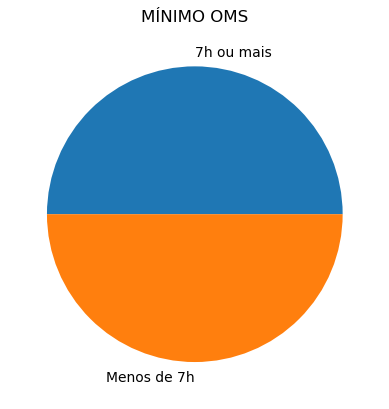

In [33]:
# CRIANDO GRÁFICO DE PIZZA SOBRE A QUALIDADE DE SONO DOS USUÁRIOS
dados_sono_agregado_Id_media.groupby('minimo_oms').count()['TotalTimeInBed'].plot.pie(ylabel= '', title = 'MÍNIMO OMS')

A análise da tabela [hourlyCalories_merged] permite verificar que o horário de maior gasto calórico médio agregado por hora do dia situa-se entre 9h-19h, praticamente coincidindo com o horário comercial e, como no conjunto de dados que relaciona as atividades intensas e muito intensas a data não traz informações de hora, não é possível identificar se o gasto é devido realmente a atividade física ou às atividades de trabalho.

<Axes: xlabel='hora'>

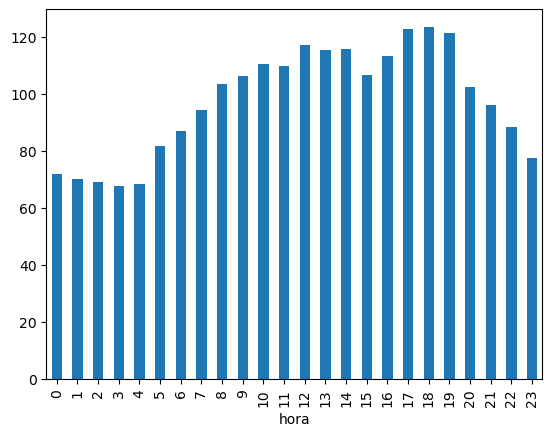

In [34]:
# CRIANDO O GRÁFICO DE BARRAS QUE VISUALIZA A MÉDIA DE CALORIAS GASTAS POR HORA DO DIA
dados_calorias_hora_agregado_hora['Calories'].mean().plot.bar()

A análise da tabela [hourlyStepsMerged] permite verificar que o horário de maior número médio de passos agregado por hora do dia situa-se entre 9h-19h, praticamente coincidindo com o horário comercial e, pelo mesmo motivo da visualização anterior, não é possível identificar se o gasto é devido realmente a atividade física ou às atividades de trabalho.

<Axes: xlabel='hora'>

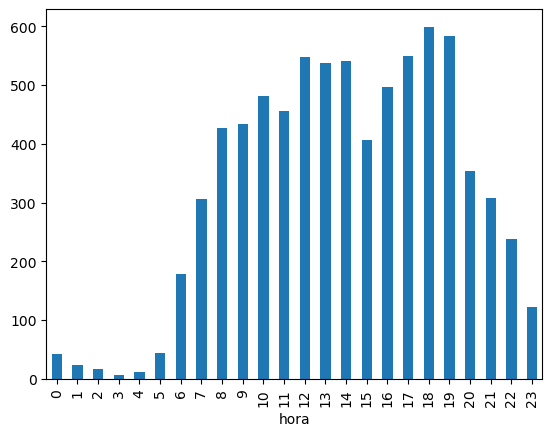

In [35]:
# CRIANDO O GRÁFICO DE BARRAS QUE VISUALIZA A MÉDIA DE PASSOS POR HORA DO DIA
dados_passos_hora_agregado['StepTotal'].mean().plot.bar()

# AGIR (RESPOSTAS ÀS PERGUNTAS DE NEGÓCIOS)

**Quais são algumas das tendências no uso de dispositivos inteligentes?**

 Existe uma forte tendência do usuário usar o smartwatch como um relógio comum, dado que mais da metade dos usuários não atendem a critérios mínimos recomendados pela OMS. Outro fator a ser levado em consideração, face a irregularidade da atividade física demonstrada, é a dificulade do usuário em manter a consistência dos seus treinos. Também merece relevo a má qualidade de sono da metade dos usuários, fator que pode ser motividor inclusive da falta de disposição para atividade física.

**Como essas tendências podem se aplicar aos clientes da Bellabeat?**

 A Bellabeat é uma fabricante de produtos de alta tecnologia voltados à saúde para mulheres, desta forma, como o conjunto de dados não possuia informações de gênero do usuário, a impossibilidade de segmentação dos dados quanto ao sexo implica que as conclusões da presente análise devem ser consideradas com esta ressalva.


**Como essas tendências podem ajudar a influenciar a estratégia de marketing da Bellabeat?**

- Desenvolvimento de produtos de configurações mais simples e maior apelo estético para o usuário que vai usar o smartwatch como simples relógio.
- Foco no software do dispositivo para criar alertas e mensagens de motivação para que o usuário  mantenha a consistência dos treinos.
- Desenvolvimento de rede social específica da comunidade de usuários Bellabeat para que os usuários avançados, os quais são em número bastante reduzido, não só se motivem a continuar treinando como também sirvam de motivação para o usuário médio de treinos irregulares.



